# Model testing

Evaluate the saved XGBoost regressor on the held-out test dataset.

### Imports

In [7]:
import joblib
import numpy as np
import pandas as pd
import os
from pathlib import Path
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


### Variables

In [8]:
target_col = "movie_score"
drop_cols = ["movie_score", "averageRating", "numVotes", "Unnamed: 0", "_orig_order"]

### Retrieve data

In [9]:
testDatasetPath = os.path.join('..', '..', 'data', 'test_dataset.csv')
final_model = joblib.load("Linear_Regression_Ridge.joblib")
df_test = pd.read_csv(testDatasetPath, sep=";")


### Prepare test data

In [10]:
# Load model and data
y_true = np.expm1(df_test[target_col].to_numpy())
y_true_original = y_true
X_test = df_test.drop(columns=[c for c in drop_cols if c in df_test.columns])


### Create prediction on test

In [11]:
# Predict
y_pred = final_model.predict(X_test)
y_pred_original = y_pred

### Calculate MAE, RMSE and R^2

In [12]:
# Metrics (only if ground truth available)
if y_true is not None:
    mae = mean_absolute_error(y_true_original, y_pred_original)
    rmse = np.sqrt(mean_squared_error(y_true_original, y_pred_original))
    r2 = r2_score(y_true, y_pred)
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")
else:
    print("Ground-truth 'movie_score' not found in test set; only predictions are available.")


MAE:  10686.5617
RMSE: 23809.2355
R2:   -0.0371


### Create a preview dataframe

In [13]:
# Preview predictions
preview = pd.DataFrame({"predicted_movie_score": y_pred_original, "residual": y_pred_original - y_true_original})
if y_true is not None:
    preview.insert(0, "actual_movie_score", y_true_original)
preview.head()

,actual_movie_score,predicted_movie_score,residual
0,86.0,23726.619981,23640.619981
1,65407.0,43381.452170,-22025.547830
2,317368.0,69684.793391,-247683.206609
3,16041.0,21228.396532,5187.396532
4,406841.0,49107.270334,-357733.729666


### Graph over residuals

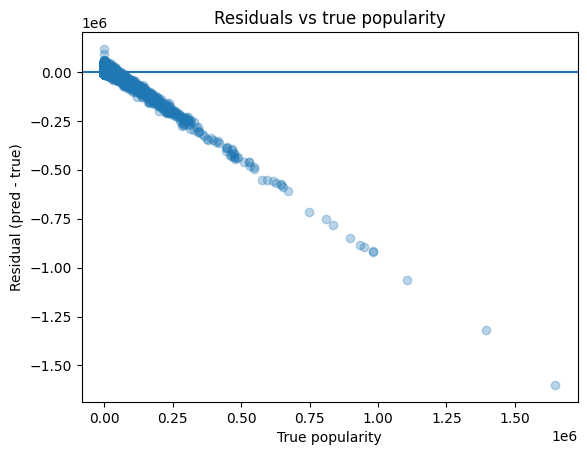

In [14]:
residuals = y_pred - y_true

plt.figure()
plt.scatter(y_true, residuals, alpha=0.3)
plt.axhline(0)
plt.xlabel("True popularity")
plt.ylabel("Residual (pred - true)")
plt.title("Residuals vs true popularity")
plt.show()


### Bias plot

/var/folders/74/dcwqhys10x5cqq_c4j3fdmnm0000gn/T/ipykernel_30140/1053863145.py:3: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(ratio), bins=50)


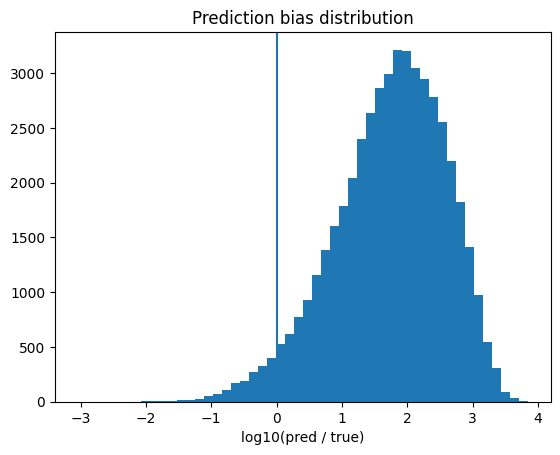

In [15]:
ratio = y_pred / (y_true + 1e-9)
plt.figure()
plt.hist(np.log10(ratio), bins=50)
plt.axvline(0)  # log10(1)
plt.xlabel("log10(pred / true)")
plt.title("Prediction bias distribution")
plt.show()

